## 图机器学习实验2

### 实验目标

1. 通过对 `Karate Club Network` 的学习，了解 `NetworkX` 的常见使用方法
2. 学习如何将图 G 转换为 `PyTorch `张量，以便在图上执行机器学习
3. 学习如何进行 `Node Emebedding`

### 实验说明

1. 需要大家完成的任务是加粗且带有得分的题目，如 `问题 i：XXXXXXX（15分）`
2. 做完实验后，请举手通知助教检查实验代码以及问题的输出结果，以便给同学们进行打分
2. 如果大家有疑问尽量在实验课的前60分钟提出，后30分钟主要用于检查同学们的实验结果，可能时间没那么充裕


### 第一节：图的基础知识

（1）加载包

In [12]:
import networkx as nx

（2）打印基本信息

<class 'networkx.classes.graph.Graph'>


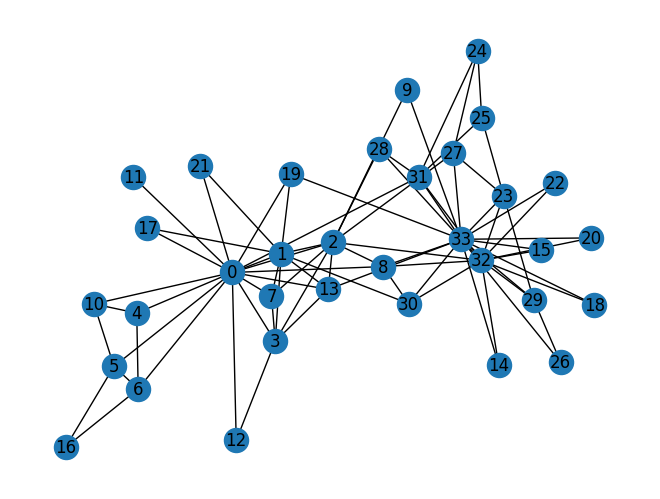

In [13]:
G = nx.karate_club_graph()

# G是一个无向图
print(type(G))  # networkx.classes.graph.Graph

# 可视化
nx.draw(G, with_labels = True)

**（3）问题1：计算`karate club network`的平均度（15分）**

In [14]:
def average_degree(num_edges, num_nodes):
  # TODO: 实现这个函数，返回值为图的平均节点度数。结果四舍五入为最近的整数
  # 提示：无向图，一边两度

  avg_degree = 0

  ############# code here ############
  avg_degree = round(2 * num_edges / num_nodes)
  ####################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


（4）计算`karate club network`的平均聚类系数

In [15]:
def average_clustering_coefficient(G):
  # TODO: 实现此函数，返回值为图G的平均聚类系数。将结果四舍五入到小数点后两位

  avg_cluster_coef = 0

  ############# code here ############
  ## 提示: 正确使用 NetworkX 的 average_clustering 函数
  ## 参考代码： https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html
  
  avg_cluster_coef = round(nx.average_clustering(G), 2)

  ####################################
  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [16]:
# 参考答案：
avg_cluster_coef = round(nx.algorithms.cluster.average_clustering(G), 2)
# Average clustering coefficient of karate club network is 0.57

**（5）问题 2：经过一次 `PageRank` 迭代后，节点 0（ID 为 0 的节点）的 `PageRank `值是多少（15分）**
$$
请通过实现 PageRank 方程来完成代码块： r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}
$$

In [17]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: 实现此函数，r1值需要四舍五入到小数点后两位
  r1 = 0

  ############# code here ############
  ## Note: 不要使用 nx.pagerank 直接计算，可以使用G.adj[node_id]获取node_id的所有邻居节点
  ## r0指的是第0轮节点0的PageRank值，r1指第一轮的值； di是指节点i的度数
  ## ∑ 指的是 求和节点 i 的所有邻居节点 j

  for node in G.adj[node_id]:
      r1 += beta * (r0 / G.degree[node_id])
  r1 += (1 - beta) * (1 / G.number_of_nodes())
  r1 = round(r1, 2)
  ####################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.03


（6）计算空手道俱乐部网络节点 5 的 ` (raw) closeness centrality`
$$
根据公式计算： c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}
$$

In [18]:
def closeness_centrality(G, node=5):
  # TODO:  实现此函数，r1值需要四舍五入到小数点后两位

  closeness = 0

  ############# code here ############
  ## 提示:
  ## 1: 可以使用 networkx 的 closeness centrality 函数.
  ## 2: closeness centrality的结果需要返回归一化后的值
  n = len(G.adj[node])
  reachable_nodes = len(nx.single_source_shortest_path_length(G, node))
  closeness = nx.closeness_centrality(G, node, wf_improved=False) / (reachable_nodes - 1) if n > 1 else 0
  closeness = round(closeness, 2)

  #####################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.01


In [19]:
# 参考答案：
n = len(G.adj[node]) # 获取邻居数量
reachable_nodes = len(nx.single_source_shortest_path_length(G, node)) # 获取可达节点数量： 计算从节点 node 出发的所有可达节点及其最短路径长度。
closeness = nx.algorithms.centrality.closeness_centrality(G, u=node, wf_improved=False) / (
    reachable_nodes - 1) if n > 1 else 0 # 如果节点 node 的邻居数量大于 1，则将接近中心性值归一化
closeness = round(closeness, 2)
# The karate club network has closeness centrality 0.01

### 第二节：图转化为张量

（1）导入 `PyTorch`

In [20]:
import torch
print(torch.__version__)

2.7.0+cpu


（2）`tensor`的基础用法

In [21]:
ones = torch.ones(3, 4)
print(ones)
"""
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
"""

zeros = torch.zeros(3, 4)
print(zeros)
"""
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
"""

random_tensor = torch.rand(3, 4)
print(random_tensor)
"""
tensor([[0.5460, 0.5905, 0.1964, 0.7431],
        [0.3519, 0.3220, 0.5103, 0.8243],
        [0.0411, 0.1229, 0.2697, 0.0375]])
"""

print(ones.shape)
"""
torch.Size([3, 4])
"""

zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)
"""
torch.float32
"""

zeros = zeros.type(torch.long)
print(zeros.dtype)
"""
torch.int64
"""

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2279, 0.2547, 0.4709, 0.0068],
        [0.7127, 0.9312, 0.4316, 0.1570],
        [0.6136, 0.3308, 0.1615, 0.7664]])
torch.Size([3, 4])
torch.float32
torch.int64


'\ntorch.int64\n'

（3）获取 `karate club network` 的边列表并将其转换为 `torch.LongTensor` 。 `pos_edge_index` 张量的 `torch.sum` 值是多少？

In [22]:
import networkx as nx
G = nx.karate_club_graph()

def graph_to_edge_list(G):
  # TODO: 实现这个函数，返回的 edge_list 应该是一个元组列表，其中每个元组代表由两个节点连接的边。

  edge_list = []

  ############# code here ############
  edge_list = list(G.edges())
  ####################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: 实现这个函数，生成的张量形状应该是 [2 x len(edge_list)]

  edge_index = torch.tensor([])

  ############# code here ############
  edge_index = torch.LongTensor(edge_list).t()
  ####################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [23]:
# 参考答案：
#（1）第一个函数
edge_list = list(G.edges) # The pos_edge_index tensor has shape torch.Size([2, 78])

#（2）第二个函数
edge_index = torch.LongTensor(edge_list).reshape(2, -1) # The pos_edge_index tensor has sum value 2535

**（4）问题1：请实现以下函数。然后回答在`karate club network`中，哪些边（edge_1 到 edge_5）可能是潜在的负边？（25 分）**

In [24]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: 实现返回neg_edge_list的函数。负边的采样数量为 num_neg_samples。无需考虑负边数量小于 num_neg_samples 的情况。在此实现中，自循环的边不被视为正边或负边。
  # 在这个实现中：我们对负边的定义为：图中不存在的边。
  # 其中 neg_edge_list 应该是一个数组，每个元素应该是(node_i, node_j)，其中连接node_i, node_j的边不在图中

  neg_edge_list = []

  ############# code here ############
  edges = list(G.edges)
  nodes = list(G.nodes)
  N = G.number_of_nodes()
  for idx_i, node_i in enumerate(nodes):
      for node_j in nodes[idx_i + 1:]:
          if (node_i, node_j) not in edges:
              neg_edge_list.append((node_i, node_j))
          if len(neg_edge_list) == num_neg_samples:
              break
      if len(neg_edge_list) == num_neg_samples:
          break
  ####################################

  return neg_edge_list

# 采样 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# 转化为张量
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# 那些边属于负边？
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# code here ############
# 请打印edge1到edge5是否为负边，是负边打印True，不是打印False
for e in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    is_neg = e in neg_edge_list or (e[::-1] in neg_edge_list)
    print(is_neg)
####################################

The neg_edge_index tensor has shape torch.Size([2, 78])
False
True
False
False
True


### 第三节：Node  Emebedding

（1）导入必要的库

In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.7.0+cpu


（2）为了编写我们自己的节点嵌入学习方法，我们将大量使用 `PyTorch` 中的 `nn.Embedding` 模块

In [26]:
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample)) # Sample embedding layer: Embedding(4, 8)

id = torch.LongTensor([1])
print(emb_sample(id))
"""
tensor([[ 1.5284,  0.5182,  0.9830, -0.1386, -0.7532, -1.0189,  2.2722,  0.9905]],
       grad_fn=<EmbeddingBackward0>)
"""

ids = torch.LongTensor([1, 3]) # 节点1和节点3
print(emb_sample(ids))
"""
tensor([[ 1.5284,  0.5182,  0.9830, -0.1386, -0.7532, -1.0189,  2.2722,  0.9905],
        [ 1.1261,  1.0260, -1.2370,  0.7350,  1.2907, -1.3524, -0.0068, -0.0361]],
       grad_fn=<EmbeddingBackward0>)
"""

shape = emb_sample.weight.data.shape
print(shape) # torch.Size([4, 8])

emb_sample.weight.data = torch.ones(shape)
ids = torch.LongTensor([0, 3]) # 节点0和节点3
print(emb_sample(ids))
"""
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)
"""

Sample embedding layer: Embedding(4, 8)
tensor([[-0.3775,  0.2054, -0.4601,  0.1203, -0.3402,  1.6027,  1.9938,  1.0273]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.3775,  0.2054, -0.4601,  0.1203, -0.3402,  1.6027,  1.9938,  1.0273],
        [-1.1982,  0.0622, -1.6842,  0.5593, -0.4175,  0.8017,  0.2887, -0.1720]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


'\ntensor([[1., 1., 1., 1., 1., 1., 1., 1.],\n        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)\n'

**（3）问题1：为图创建节点嵌入矩阵（15分）**

In [27]:
# 不要改变这行代码
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: 返回一个 torch.nn.Embedding 层，返回层的权重矩阵应在均匀分布下初始化。

  emb = None

  ############# code here ############
  emb = torch.nn.Embedding(num_nodes, embedding_dim)
  emb.weight.data.uniform_(-1.0, 1.0)
  ####################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

print("Embedding: {}".format(emb))
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-0.5773,  0.4670, -0.7134,  0.9294, -0.4133,  0.5903,  0.0341, -0.4398,
          0.6678, -0.7630, -0.5291,  0.1199,  0.7933, -0.4285, -0.6089, -0.6384],
        [ 0.4972,  0.3093, -0.2314,  0.9640,  0.2024, -0.2580, -0.0142,  0.9830,
          0.6717, -0.0741,  0.9804,  0.4391, -0.5324, -0.9101,  0.5811,  0.9378]],
       grad_fn=<EmbeddingBackward0>)


（4）可视化节点嵌入

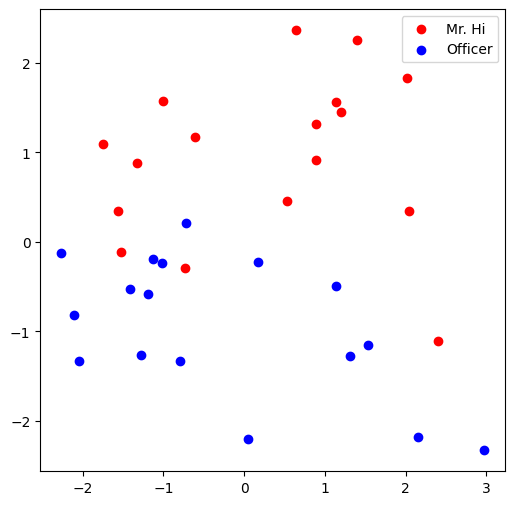

In [24]:
# 一种理解嵌入矩阵的好方法是将它在二维空间中可视化。首先进行 PCA 以将嵌入的维度降低到二维空间。然后，根据每个点所属的社区对其进行着色可视化。
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

visualize_emb(emb)

**（5）问题2：训练节点嵌入（30分）**


torch.Size([2, 78])
torch.Size([2, 156])
Epoch 1: Loss=0.0163, Acc=1.0
Epoch 50: Loss=0.0145, Acc=1.0
Epoch 100: Loss=0.0128, Acc=1.0
Epoch 150: Loss=0.0113, Acc=1.0
Epoch 200: Loss=0.0102, Acc=1.0
Epoch 250: Loss=0.0092, Acc=1.0
Epoch 300: Loss=0.0084, Acc=1.0
Epoch 350: Loss=0.0077, Acc=1.0
Epoch 400: Loss=0.0071, Acc=1.0
Epoch 450: Loss=0.0066, Acc=1.0
Epoch 500: Loss=0.0062, Acc=1.0


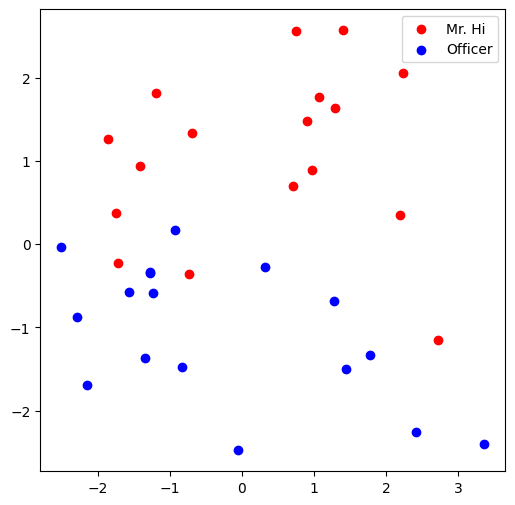

In [25]:
# 我们希望优化节点嵌入以用于将边分类为正或负的任务。给定一个边以及每个节点的嵌入，嵌入的点积随后通过 sigmoid 函数，应该给出该边为正（sigmoid 输出大于 0.5）或负（sigmoid 输出小于 0.5）的可能性。

from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: 该函数接收 pred 张量（sigmoid 之后的结果张量）和标签张量（torrent.LongTensor）。预测值大于 0.5 将被分类为标签 1。否则将归类为标签 0。返回的准确度应四舍五入到小数点后 4 位。

  accu = 0.0

  ############# code here ############
  pred_label = (pred > 0.5).long()
  correct = (pred_label == label).sum().item()
  accu = round(correct / len(label), 4)
  ####################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: 实现 train 函数， 你可以改变 训练的迭代次数以及学习率 以获得更高的性能，下面是参考的实现步骤
  # (1) 获取 train_edge 中节点的嵌入
  # (2) 对每个节点对之间的嵌入进行点积
  # (3) 将点乘结果输入 sigmoid
  # (4) 将 sigmoid 输出输入 loss_fn
  # (5) 打印每个 epoch 的损失和准确率
  # (6) 使用损失和优化器更新嵌入结果

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):
    ############# code here ############
    optimizer.zero_grad()
    node_i = train_edge[0]
    node_j = train_edge[1]
    emb_i = emb(node_i)
    emb_j = emb(node_j)
    score = (emb_i * emb_j).sum(dim=1)
    pred = sigmoid(score)
    loss = loss_fn(pred, train_label)
    loss.backward()
    optimizer.step()
    if (i+1) % 50 == 0 or i == 0:
      acc = accuracy(pred, train_label)
      print(f"Epoch {i+1}: Loss={loss.item():.4f}, Acc={acc}")
    ####################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

train_label = torch.cat([pos_label, neg_label], dim=0)
# 由于网络非常小，我们不把边分成 val/test 集
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

# 可视化最终结果
visualize_emb(emb)